In [4]:
import sys
sys.version


'3.13.9 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 19:09:58) [MSC v.1929 64 bit (AMD64)]'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#All essential libraries imported successfully!


In [6]:
import scipy
import statsmodels.api as sm


In [7]:
# E-commerce Data Preparation and Feature Engineering

## 1. Environment Setup and Library Verification
## 2. Data Loading
## 3. Data Understanding
## 4. Data Cleaning
## 5. Data Transformation
## 6. Feature Engineering
## 7. Final Cleaned Dataset

In [8]:
#1. Loading he dataset
df = pd.read_excel(r"C:\Users\Hp\Downloads\Online Retail.xlsx")

print("Shape of dataset:", df.shape)
display(df.head())


Shape of dataset: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#3️⃣ Understand the Data
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
print("\nStatistical Summary:")
display(df.describe())



Statistical Summary:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
print("\nMissing values per column:")
display(df.isnull().sum())



Missing values per column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
print("\nDuplicate rows:", df.duplicated().sum())




Duplicate rows: 5268


In [13]:
#4️⃣ Data Cleaning
#4.1 Remove Duplicate Records
df.drop_duplicates(inplace=True)


In [14]:
#4.2 Remove Missing Customer IDs
df = df[df['CustomerID'].notnull()]


In [15]:
#4.3 Remove Invalid Quantity and Price  
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [16]:
#4.4 Correct Data Types
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [17]:
#5️⃣ Post-Cleaning Validation
print("Shape after cleaning:", df.shape)


Shape after cleaning: (392692, 8)


In [18]:
print("\nMissing values per column after cleaning:")
display(df.isnull().sum())



Missing values per column after cleaning:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
print("\nDuplicate rows after cleaning:", df.duplicated().sum())



Duplicate rows after cleaning: 0


In [20]:
display(df.head())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [21]:
#5️⃣ Feature Engineering
#5.1 Create New Features
#Total Purchase Value
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']



In [22]:
#Invoice Day & Month (Time-based Features)
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceMonth'] = df['InvoiceDate'].dt.month



In [23]:
#Customer-Level Aggregation (RFM-style Features)
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',      # Frequency
    'Quantity': 'sum',           # Total quantity purchased
    'TotalPrice': 'sum',         # Monetary value
    'InvoiceDate': 'max'         # Recency calculation
}).reset_index()

customer_df.columns = [
    'CustomerID',
    'NumInvoices',
    'TotalQuantity',
    'TotalSpending',
    'LastPurchaseDate'
]


In [24]:
#Recency Feature (Days Since Last Purchase)
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

customer_df['Recency'] = (snapshot_date - customer_df['LastPurchaseDate']).dt.days


In [25]:
#Review Engineered Features
print("Shape of customer-level dataset:", customer_df.shape)
display(customer_df.head())


Shape of customer-level dataset: (4338, 6)


,CustomerID,NumInvoices,TotalQuantity,TotalSpending,LastPurchaseDate,Recency
0,12346,1,74215,77183.60,2011-01-18 10:01:00,326
1,12347,7,2458,4310.00,2011-12-07 15:52:00,2
2,12348,4,2341,1797.24,2011-09-25 13:13:00,75
3,12349,1,631,1757.55,2011-11-21 09:51:00,19
4,12350,1,197,334.40,2011-02-02 16:01:00,310


In [26]:
#5️⃣ Feature Selection
features = [
    'Recency',
    'NumInvoices',
    'TotalQuantity',
    'TotalSpending'
]

X = customer_df[features]
display(X.head())


,Recency,NumInvoices,TotalQuantity,TotalSpending
0,326,1,74215,77183.60
1,2,7,2458,4310.00
2,75,4,2341,1797.24
3,19,1,631,1757.55
4,310,1,197,334.40


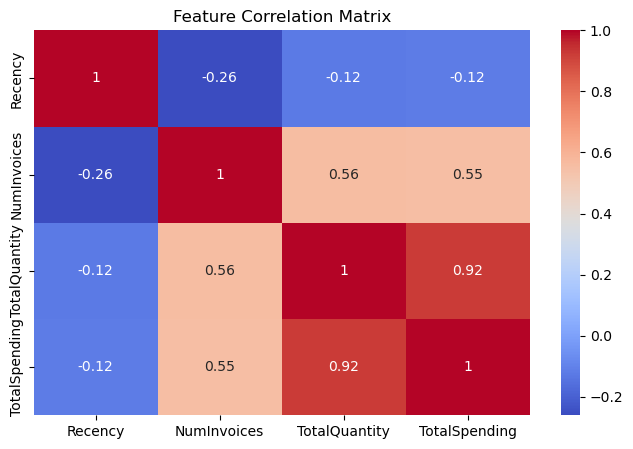

In [27]:
#Check Feature Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [28]:
#Feature Scaling (Before Clustering)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
# Component 4
#Now Step 1: Elbow Method (Find Optimal k)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [30]:
#Computing WCSS
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


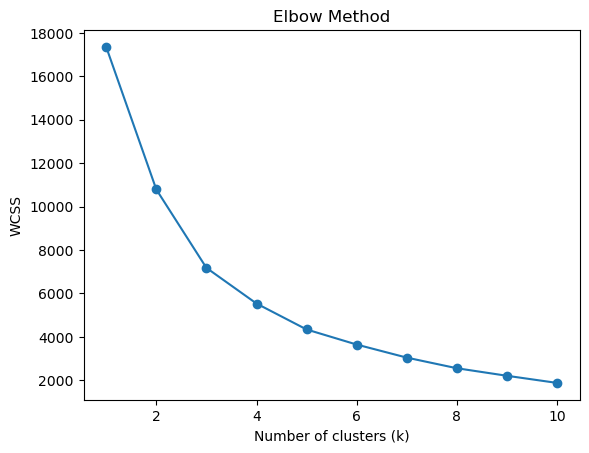

In [31]:
#plotting Elbow curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [32]:
#k = 1  to 3 → very sharp drop in WCSS
#k = 3 to 4 → still a noticeable improvement
#After k = 4 → the curve starts flattening (diminishing returns)
# So Elbow point = k = 4

In [33]:
# Run K-means with K=4 as our examined output. So,

kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

cluster_labels = kmeans.fit_predict(X_scaled)


In [41]:
customer_df['Cluster'] = cluster_labels




In [44]:
customer_df.head()

customer_df['Cluster'].value_counts()



Cluster
0    3204
2    1079
3      48
1       7
Name: count, dtype: int64

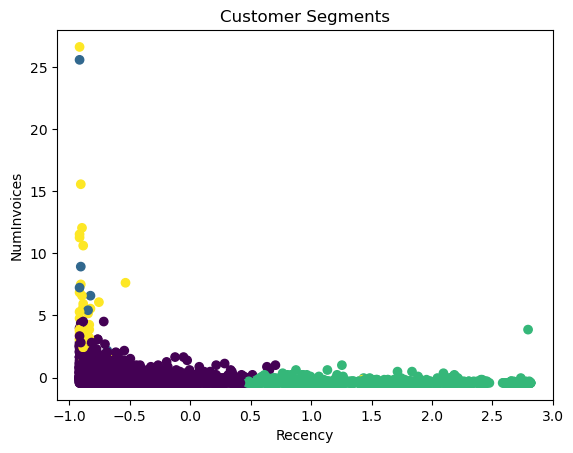

In [45]:
#Now we will visualize the clusters(scatter plots)
plt.figure()
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=cluster_labels
)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Customer Segments')
plt.show()


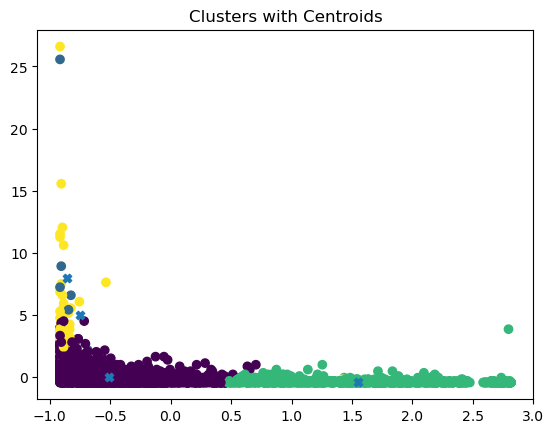

In [46]:
#optional plot centriods
centroids = kmeans.cluster_centers_

plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X')
plt.title('Clusters with Centroids')
plt.show()


In [47]:
# we have already confirmed cluster datset and added the 
# cluster labels as a new column to the original dataset before in cell 41 and 44.

In [48]:
#Now, Analyze Each Customer Segment (Statistics)
cluster_mean = customer_df.groupby('Cluster')[features].mean()
cluster_mean


,Recency,NumInvoices,TotalQuantity,TotalSpending
Cluster,,,,
0,41.781835,4.466604,987.247503,1670.912195
1,6.714286,65.428571,89627.285714,184080.341429
2,247.140871,1.581094,266.583874,518.290066
3,17.541667,42.854167,22371.375000,35121.017708


In [49]:
cluster_stats = customer_df.groupby('Cluster')[features].agg(['mean', 'median', 'std'])
cluster_stats


Recency                   NumInvoices                    \
               mean median        std        mean median        std   
Cluster                                                               
0         41.781835   31.0  35.525327    4.466604    3.0   4.562448   
1          6.714286    2.0   8.479668   65.428571   55.0  64.484771   
2        247.140871  242.0  66.886167    1.581094    1.0   1.453884   
3         17.541667    4.0  56.653842   42.854167   33.0  34.988746   

        TotalQuantity                         TotalSpending              \
                 mean   median           std           mean      median   
Cluster                                                                   
0          987.247503    520.5   1315.914368    1670.912195     900.865   
1        89627.285714  77374.0  48088.671964  184080.341429  168472.500   
2          266.583874    152.0    426.416679     518.290066     310.060   
3        22371.375000  17190.0  16867.716459   35121.017708   28818.275   

                       
                  std  
Cluster                
0         2204.888449  
1        64425.445179  
2         1366.240005  
3        20743.083168

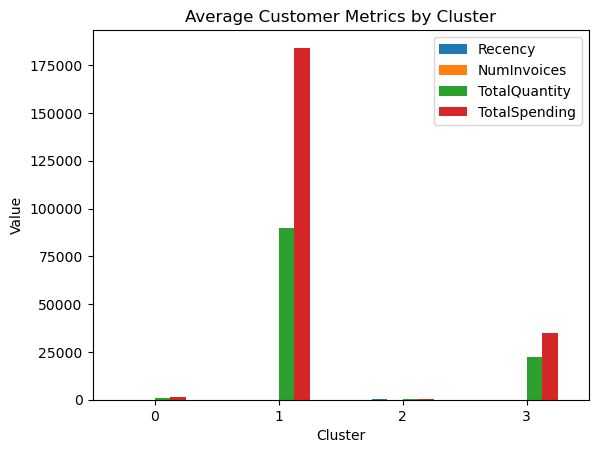

In [50]:
#Visulaizing cluster differences
#1. Bar Chart – Mean Comparison
cluster_mean.plot(kind='bar')
plt.title('Average Customer Metrics by Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()


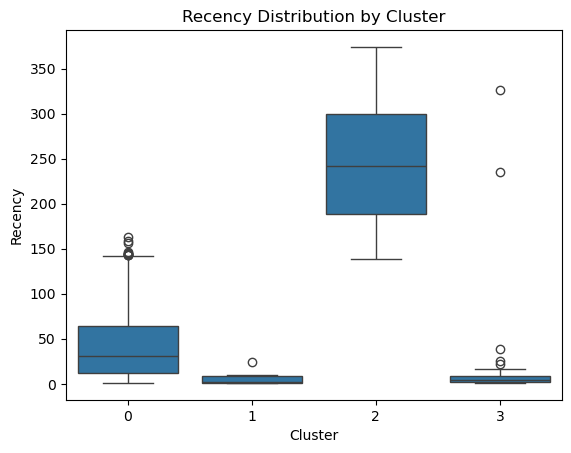

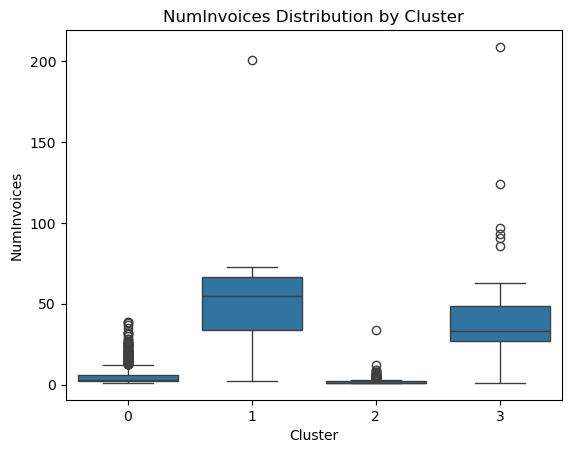

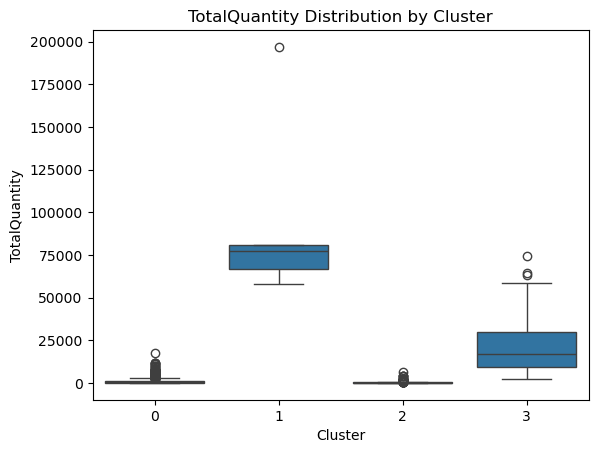

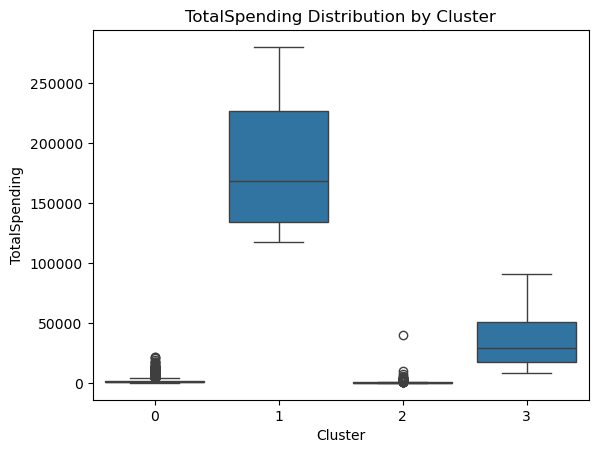

In [52]:
#2.Box Plots – Feature Distribution

for col in features:
    plt.figure()
    sns.boxplot(x='Cluster', y=col, data=customer_df)
    plt.title(f'{col} Distribution by Cluster')
    plt.show()


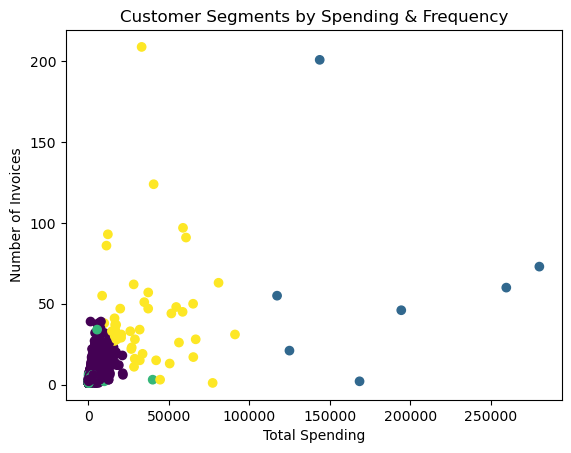

In [53]:
#3,Pairwise Scatter
plt.figure()
plt.scatter(
    customer_df['TotalSpending'],
    customer_df['NumInvoices'],
    c=customer_df['Cluster']
)
plt.xlabel('Total Spending')
plt.ylabel('Number of Invoices')
plt.title('Customer Segments by Spending & Frequency')
plt.show()


In [ ]:
# CUSTOMER SEGMENTATION BASED ON FINDINGS
# Here, Cluster 1 — VIP / High-Value Power Customers
# Recency:        6.7   (very recent)
# NumInvoices:    65.4  (extremely frequent)
# TotalQuantity:  89,627
# TotalSpending: 184,080

# Cluster 3 — Loyal High-Frequency Customers 
# Recency:        17.5
# NumInvoices:    42.9
# TotalQuantity:  22,371
# TotalSpending: 35,121

# Cluster 0 — Mid-Value Occasional Customers
#Recency:        41.8
# NumInvoices:    4.5
# TotalQuantity:  987
# TotalSpending: 1,670

#Cluster 2 — At-Risk / Low-Value Customers
# Recency:        247.1  (very inactive)
# NumInvoices:    1.6
# TotalQuantity:  267
# TotalSpending: ₹518

